In [18]:
%load_ext autoreload
%autoreload 2

import torch
from model import LofiModel
from dataset import MidiDataset
from config import *
print(torch.__version__)
print(torch.version.cuda)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.7.1+cu118
11.8


In [ ]:
dataset = MidiDataset(
        midi_dir=DATASET_DIR,
        num_bars=NUM_BARS,
        steps_per_bar=STEPS_PER_BAR,
        use_sliding_window=USE_SLIDING_WINDOW,
        stride_in_bars=STRIDE_IN_BARS
    )

Found 499 MIDI files.
Processing MIDI files and extracting segments...


Processing files:   0%|          | 0/499 [00:00<?, ?it/s]

Processing files: 100%|██████████| 499/499 [00:57<00:00,  8.63it/s]


Successfully extracted 39187 segments from 499 files.


## Reconstruction

Epoch 10
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_10.pth


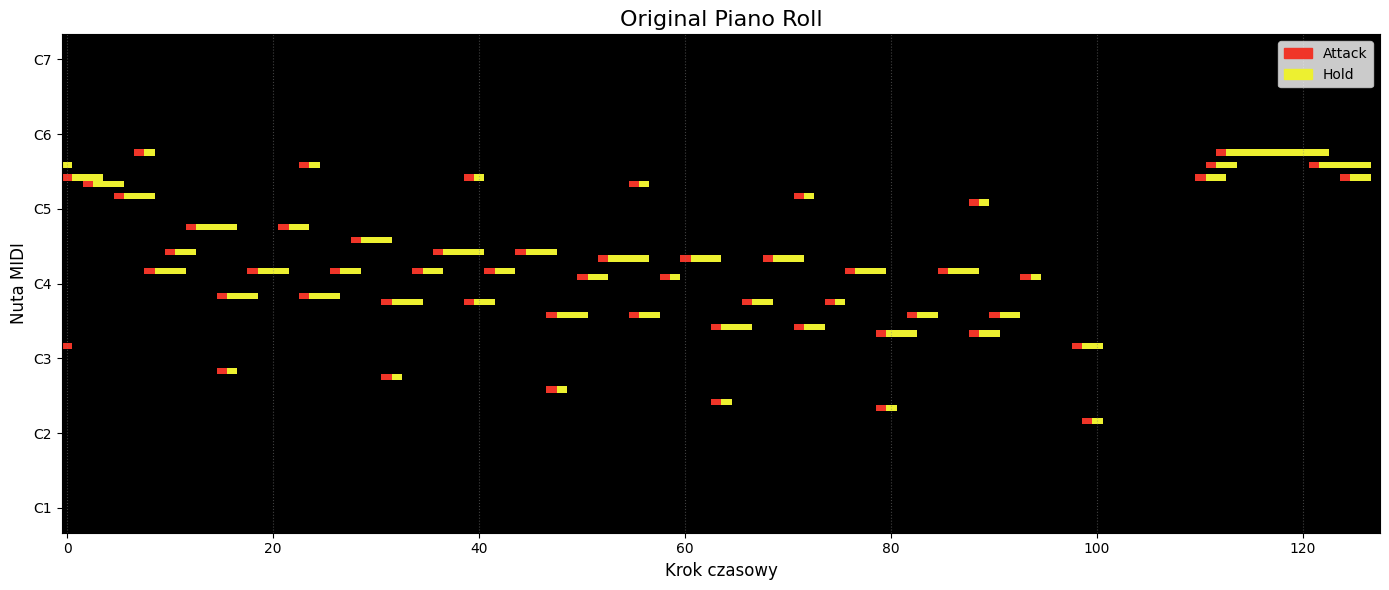

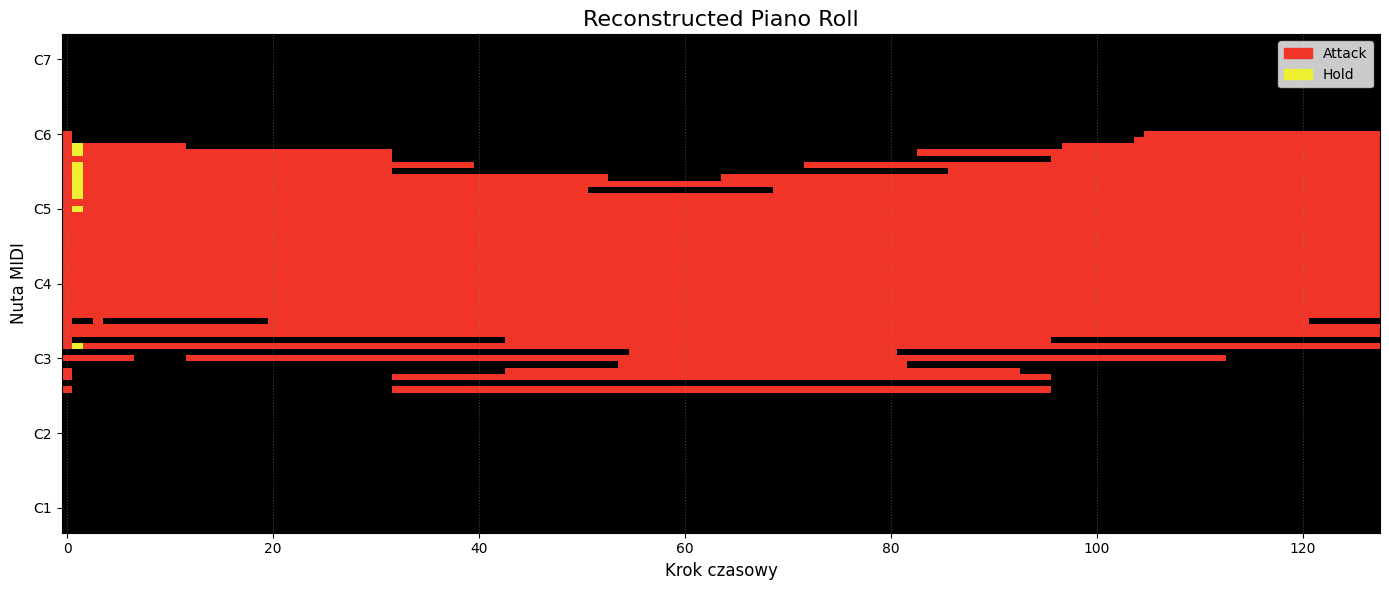

________________________________________________________________________________________________________________________


Epoch 20
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_20.pth


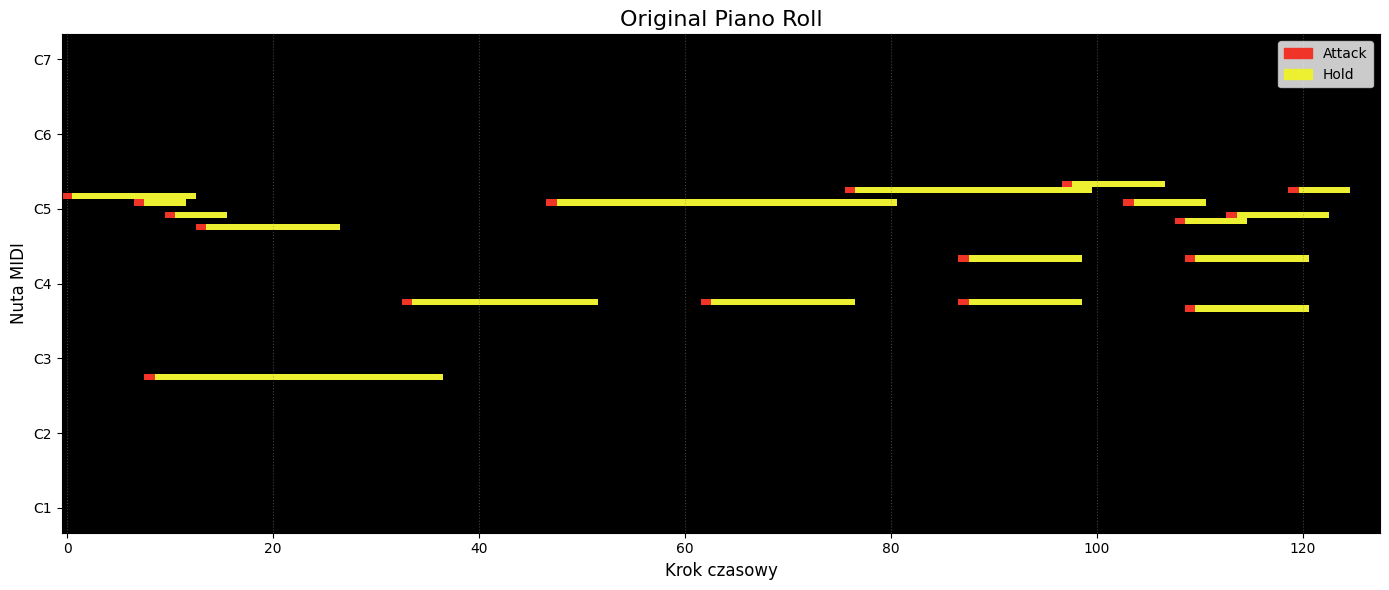

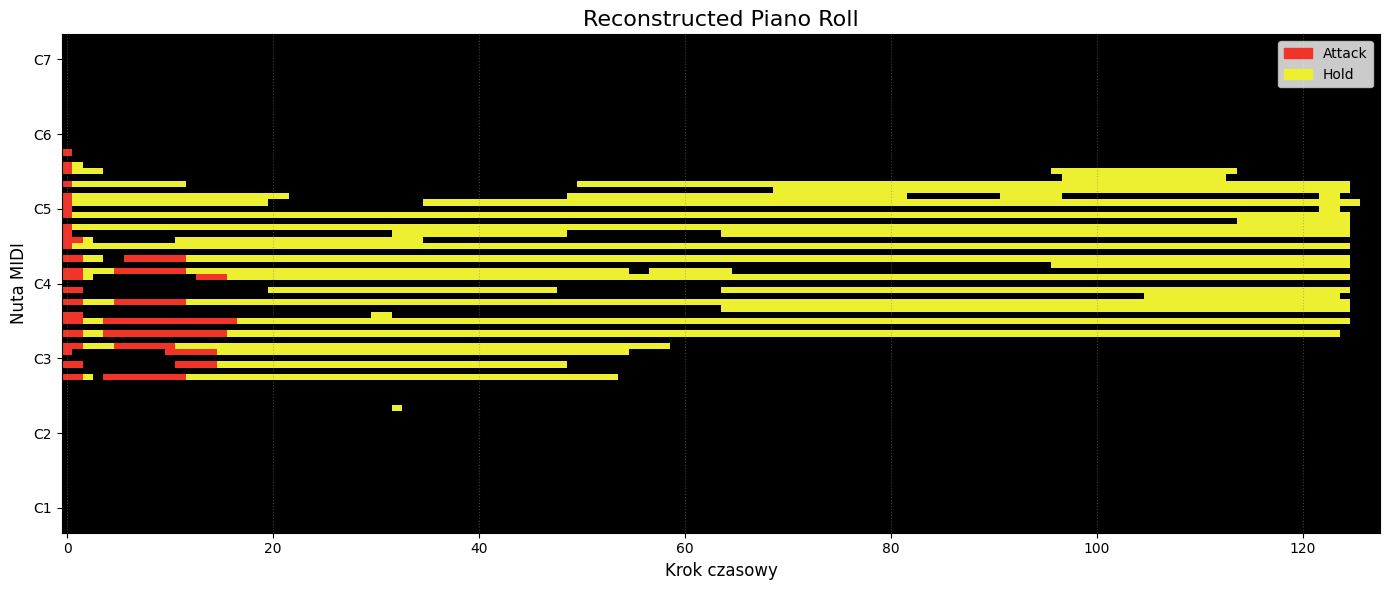

________________________________________________________________________________________________________________________


Epoch 30
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_30.pth


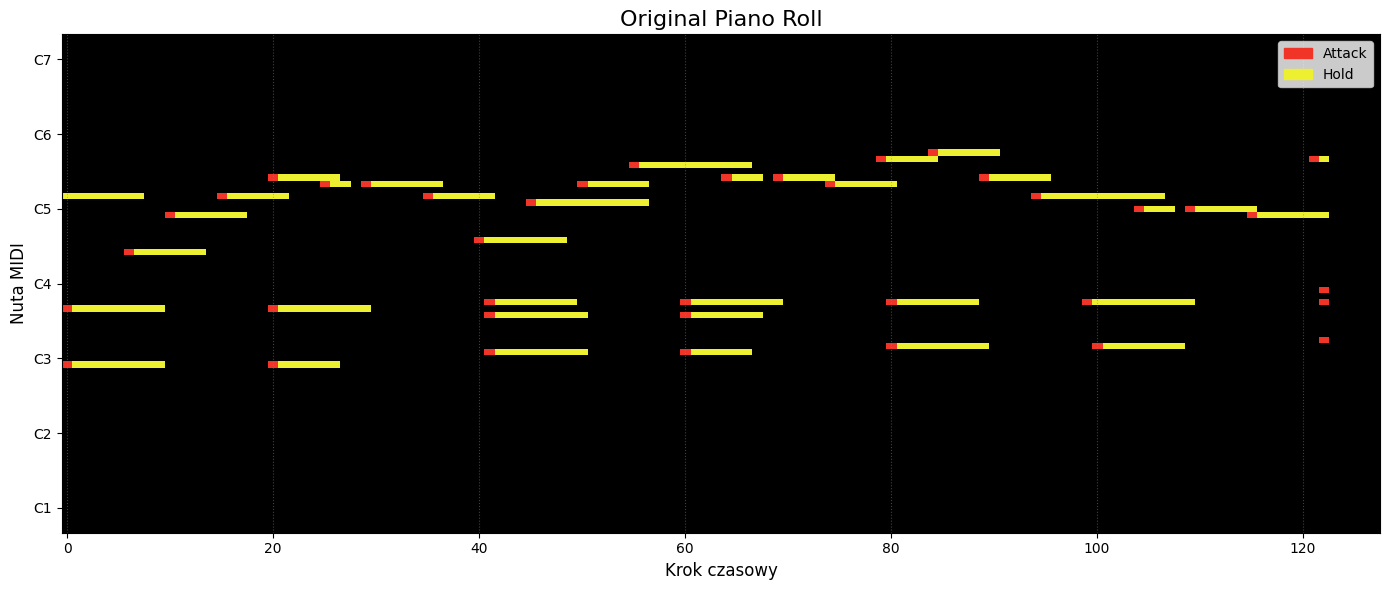

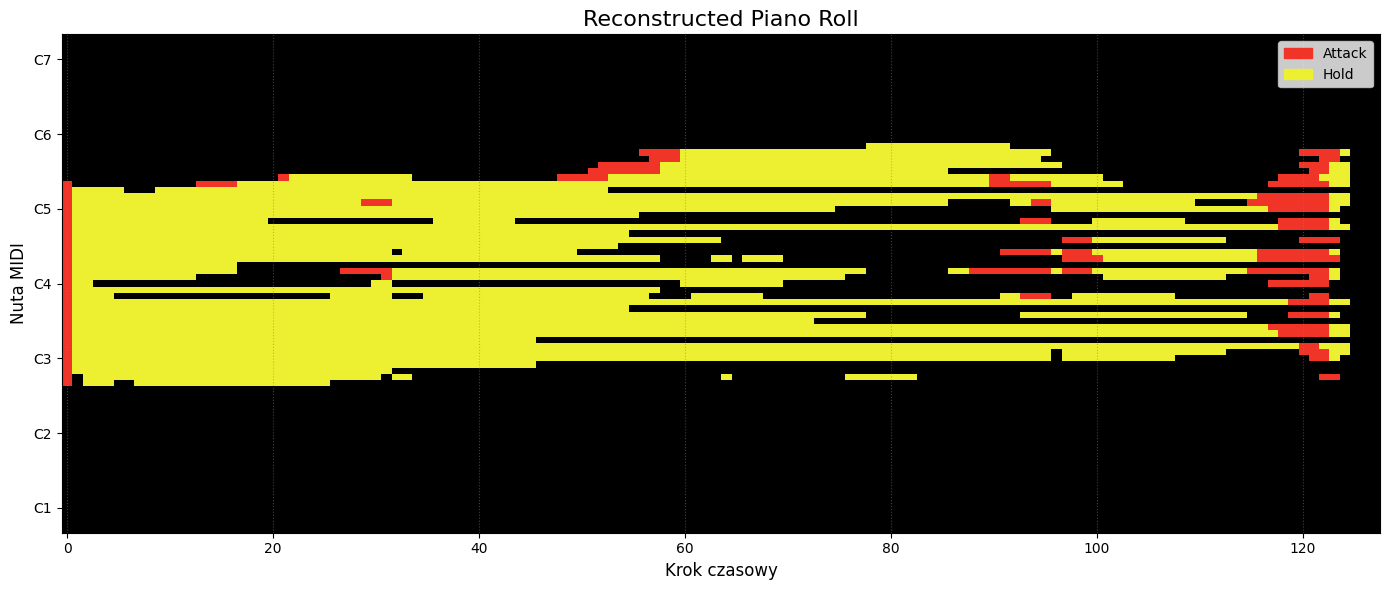

________________________________________________________________________________________________________________________


Epoch 40
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_40.pth


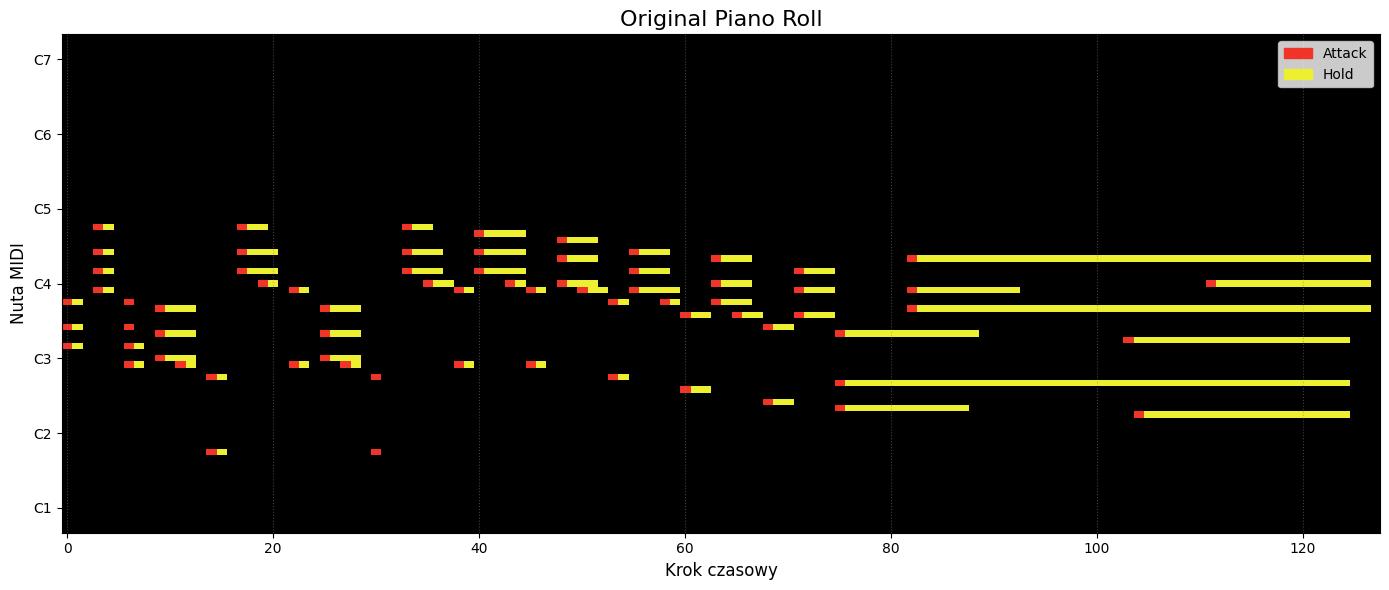

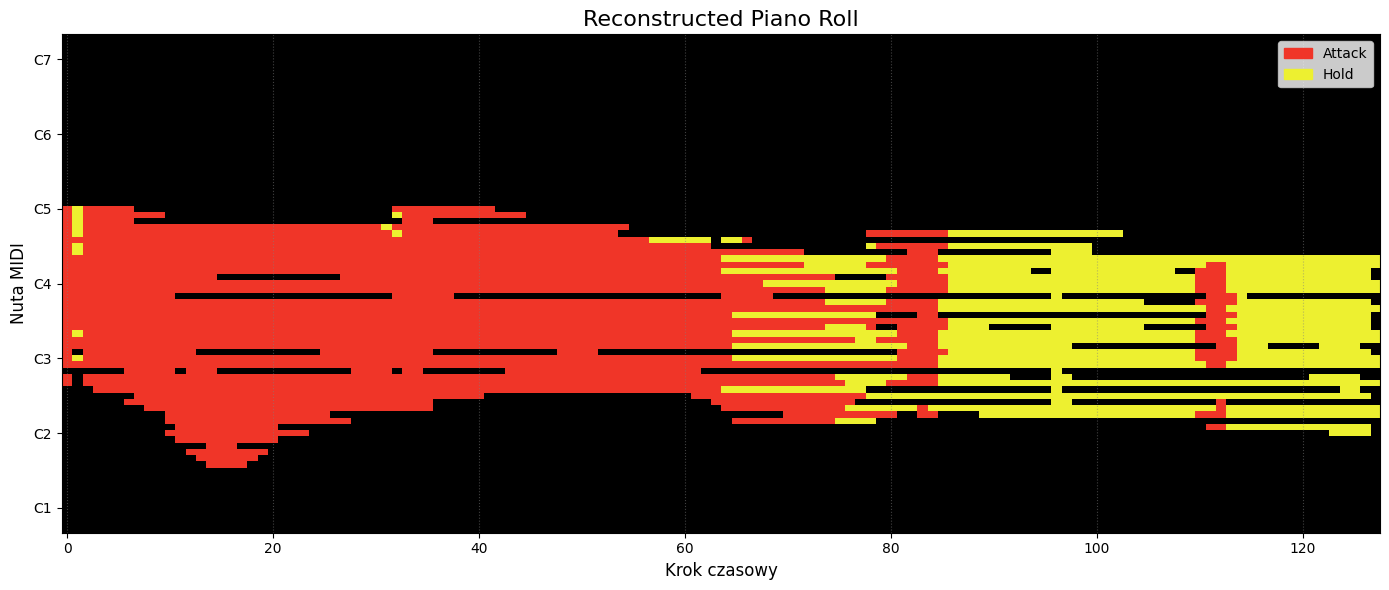

________________________________________________________________________________________________________________________


Epoch 50
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_50.pth


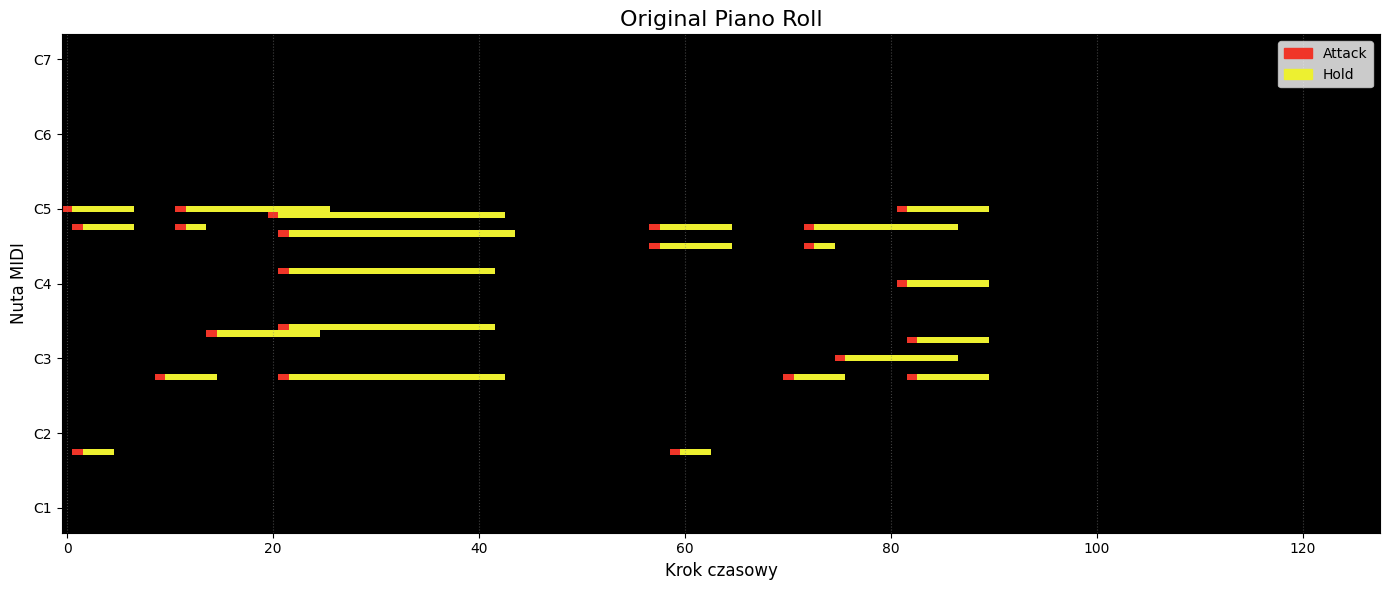

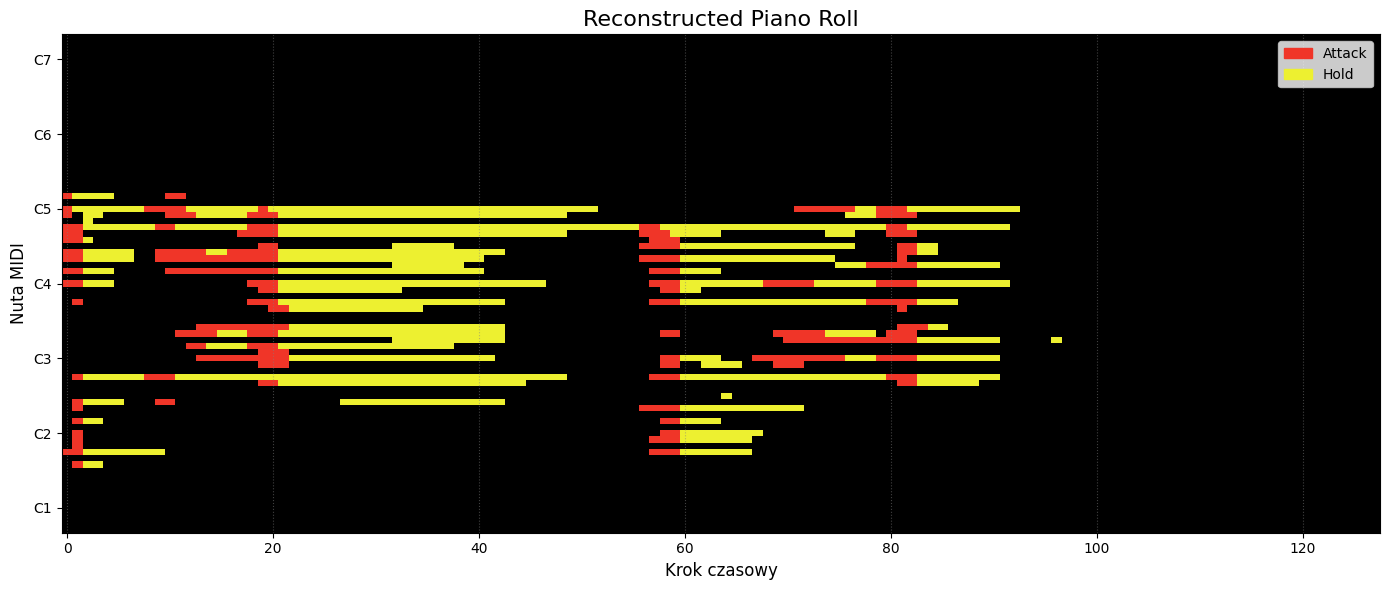

________________________________________________________________________________________________________________________


Epoch 60
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_60.pth


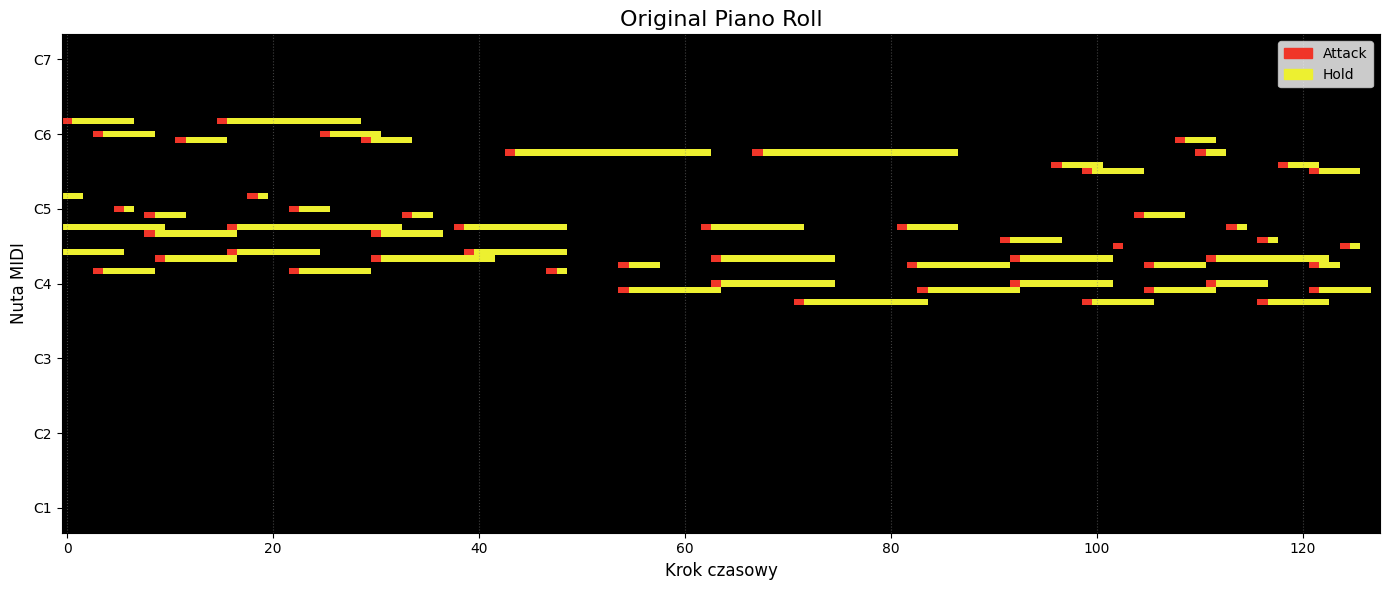

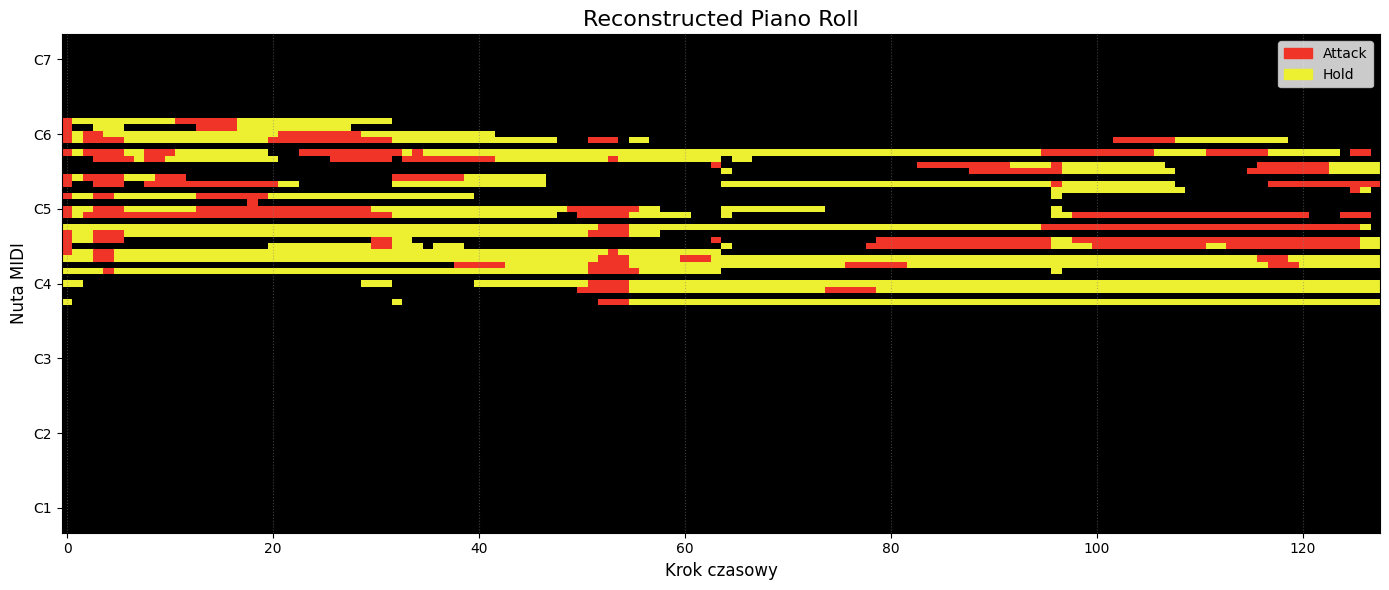

________________________________________________________________________________________________________________________


Epoch 70
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_70.pth


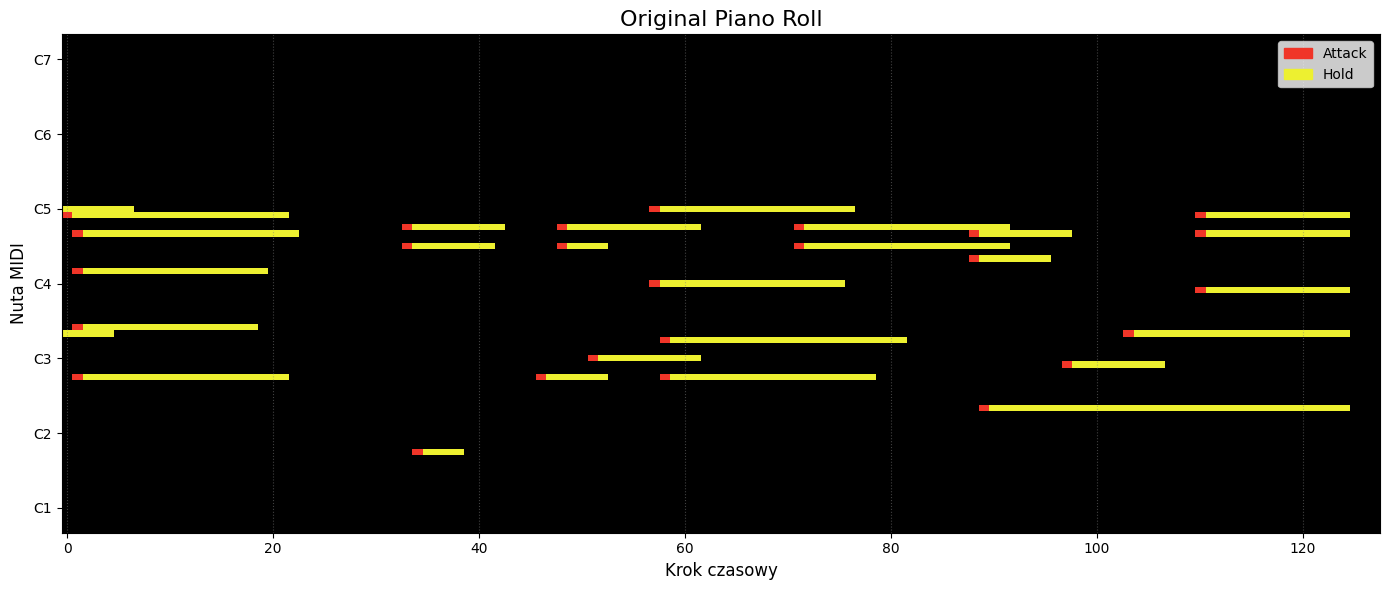

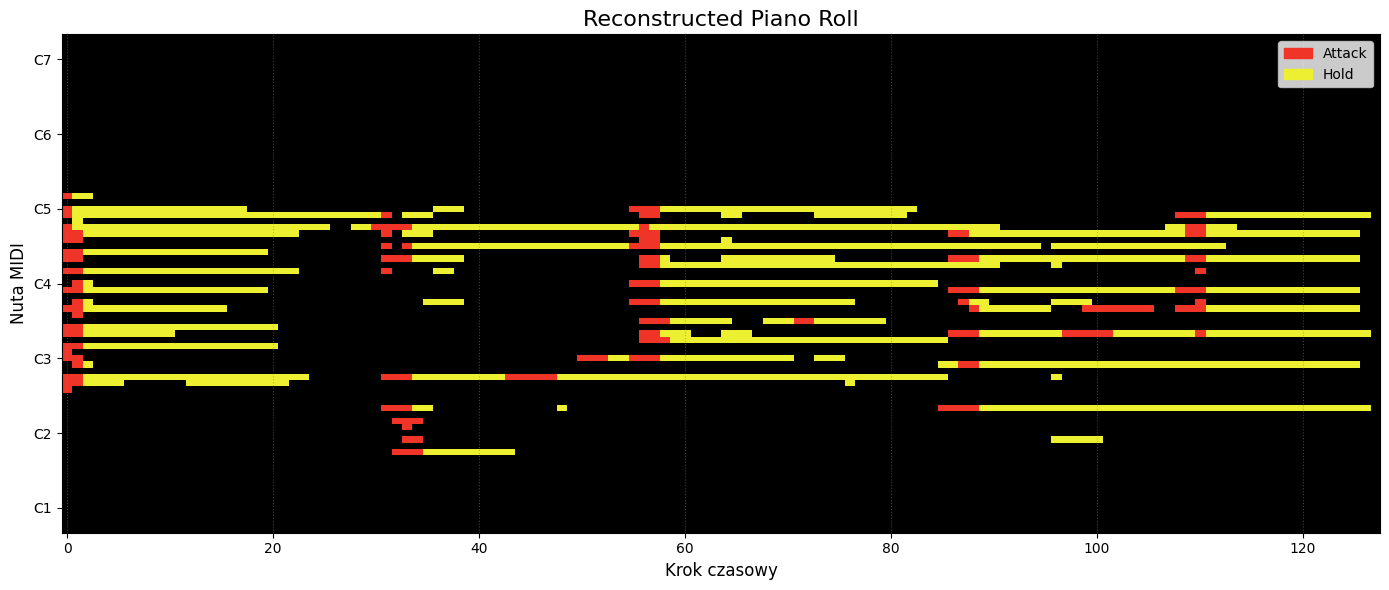

________________________________________________________________________________________________________________________


Epoch 80
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_80.pth


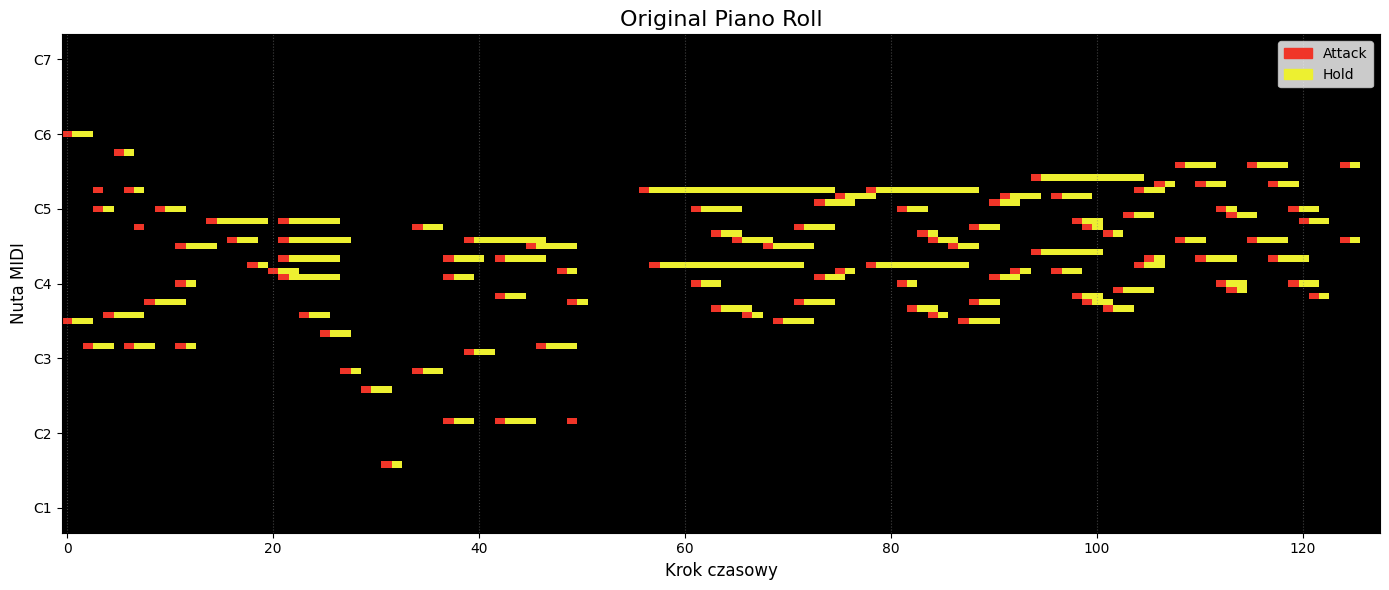

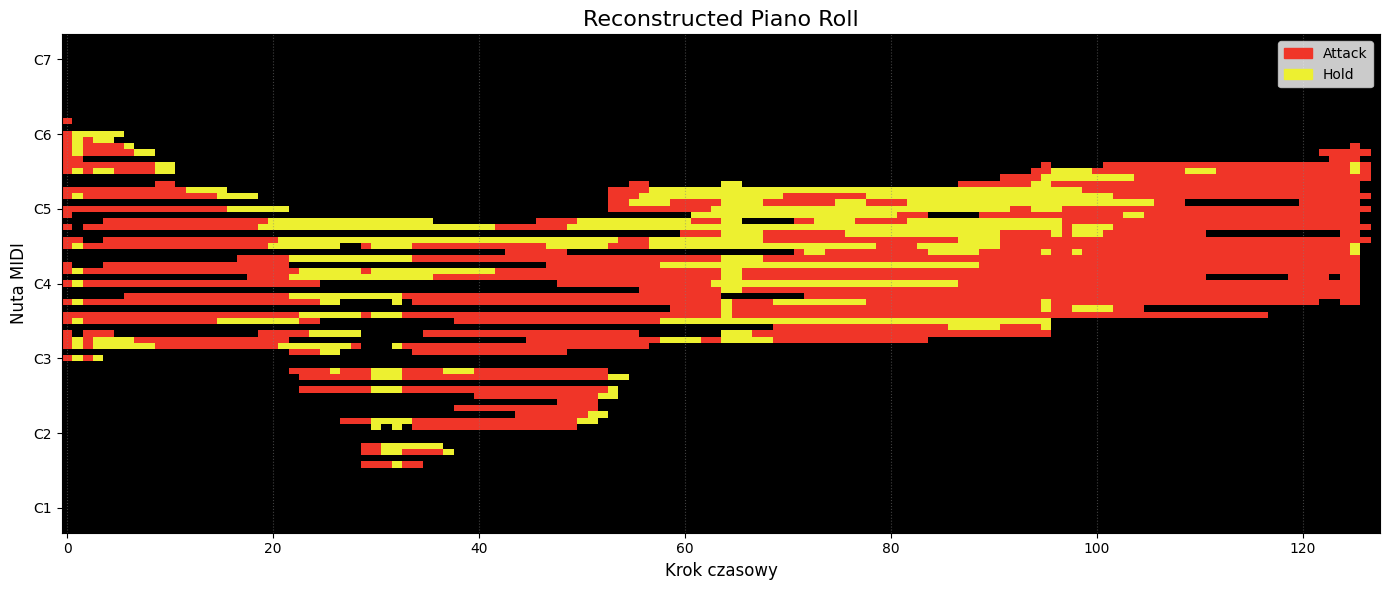

________________________________________________________________________________________________________________________


Epoch 90
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_90.pth


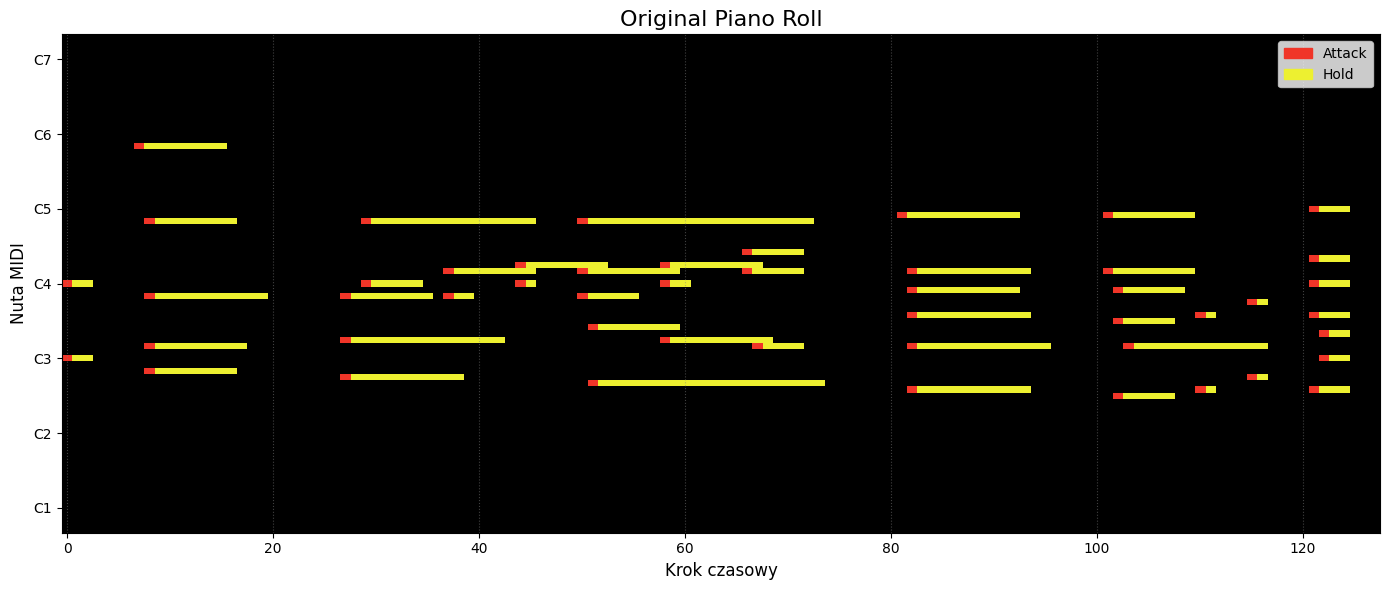

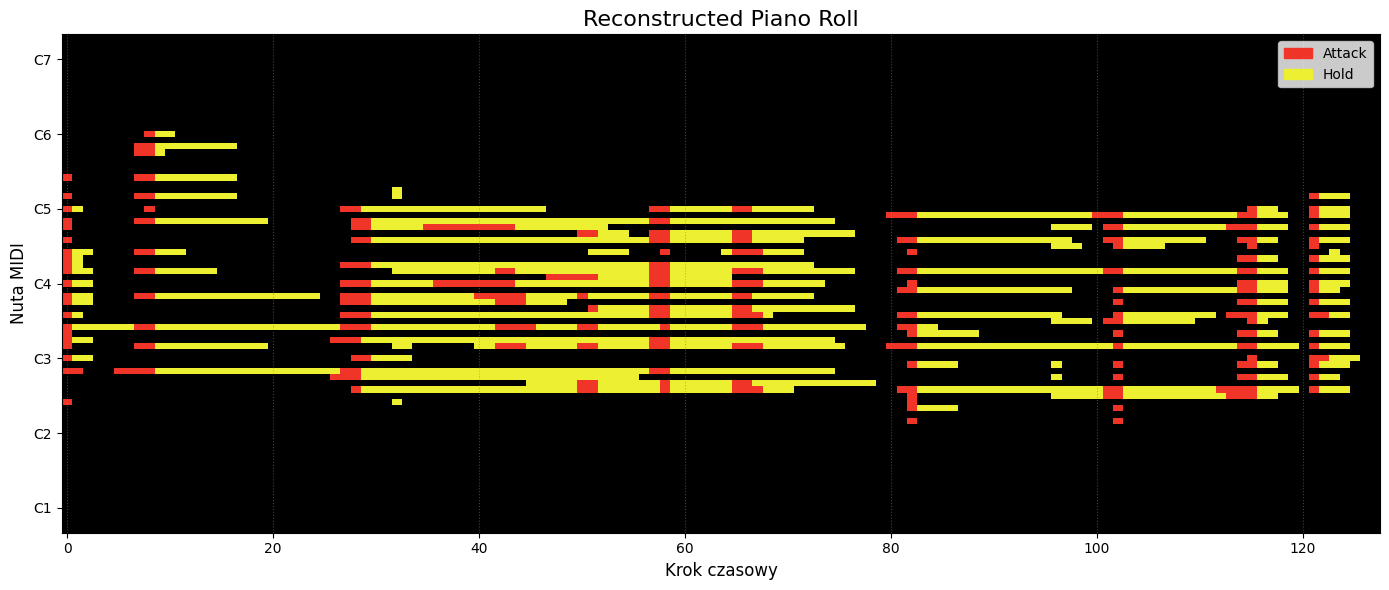

________________________________________________________________________________________________________________________


Epoch 100
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_100.pth


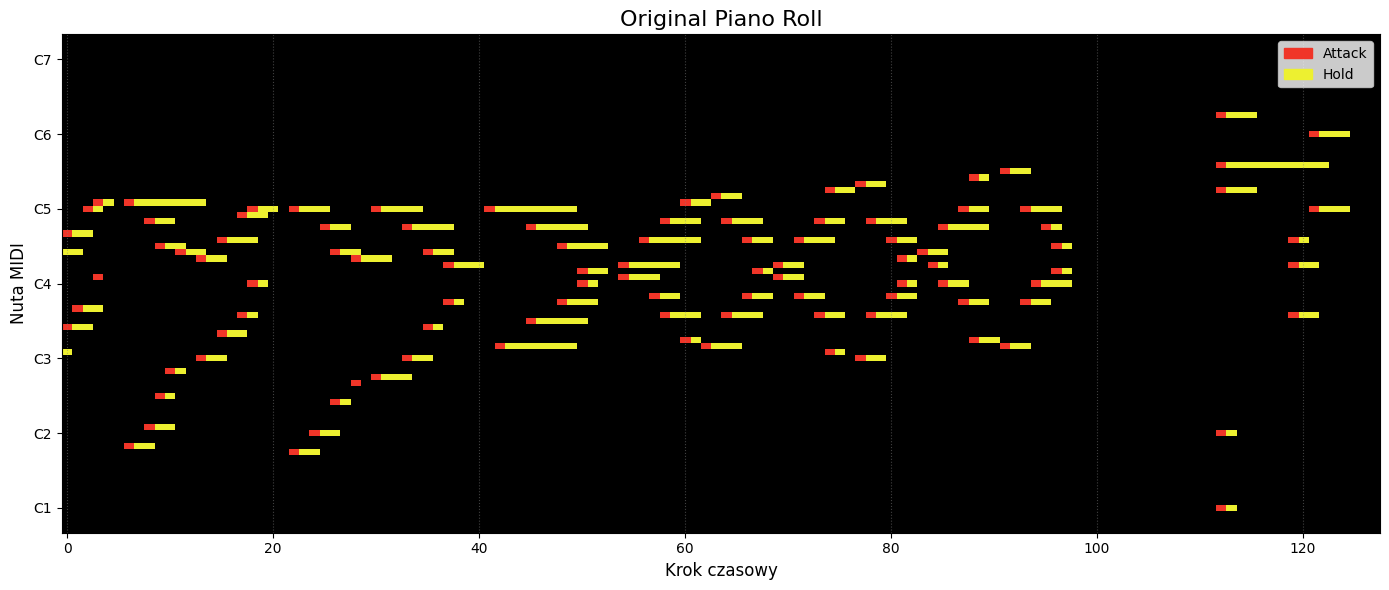

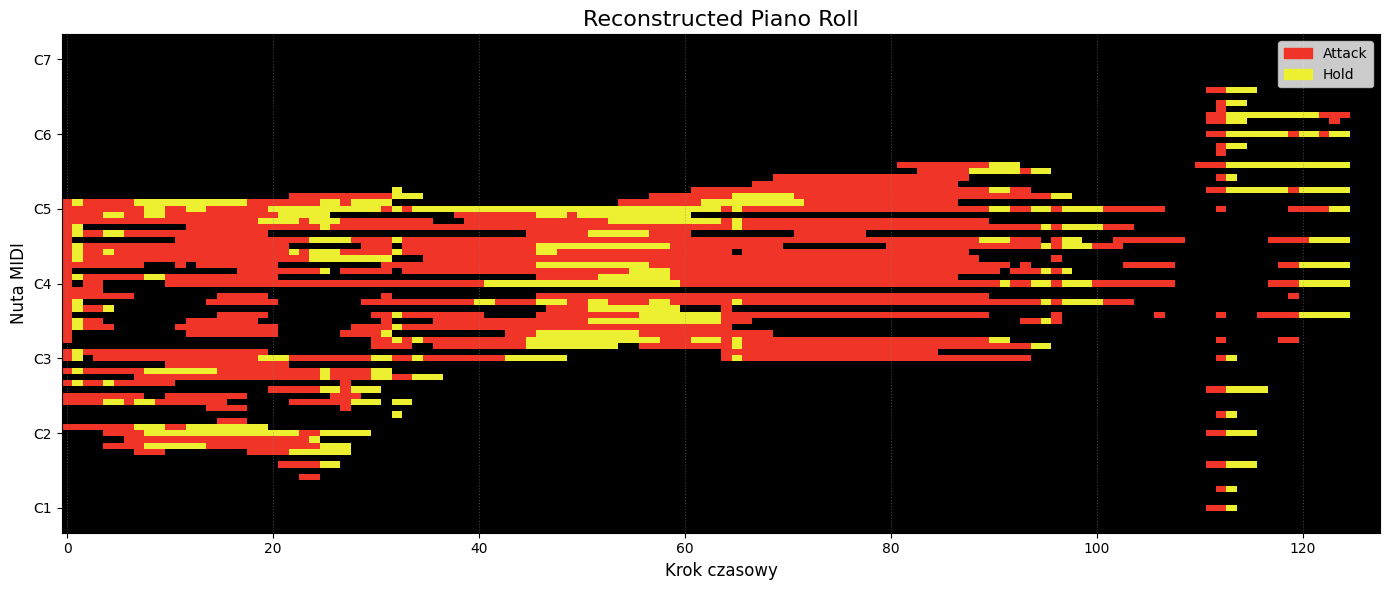

________________________________________________________________________________________________________________________


Epoch 110
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_110.pth


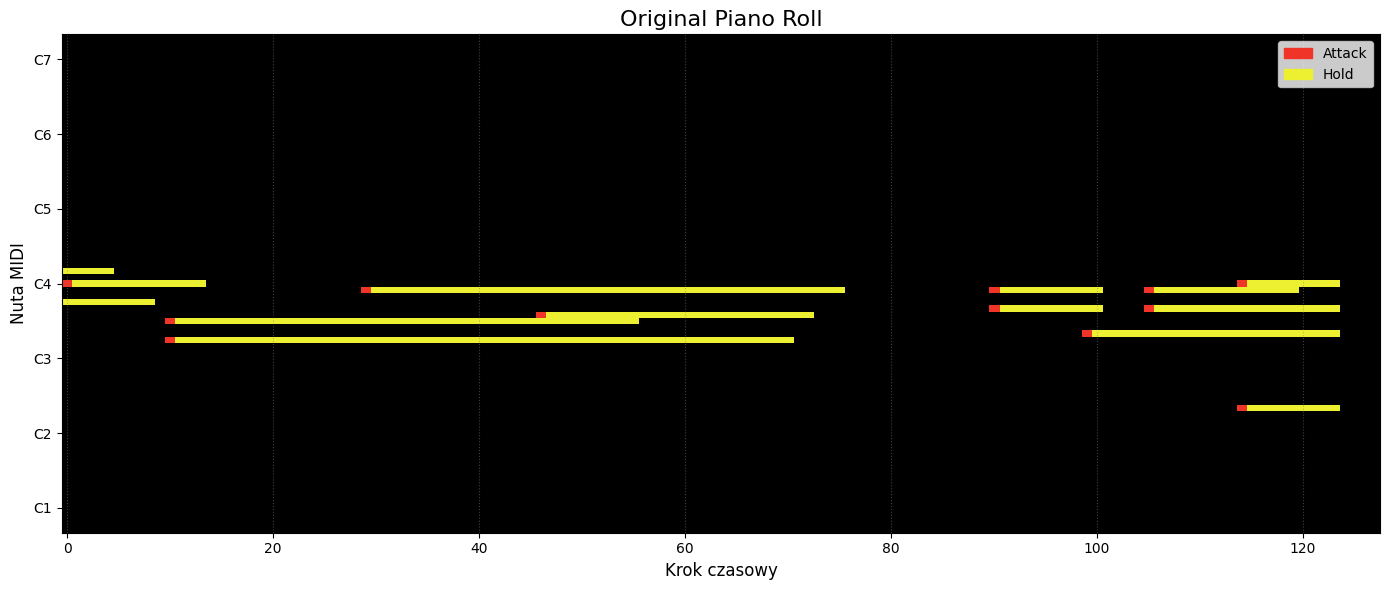

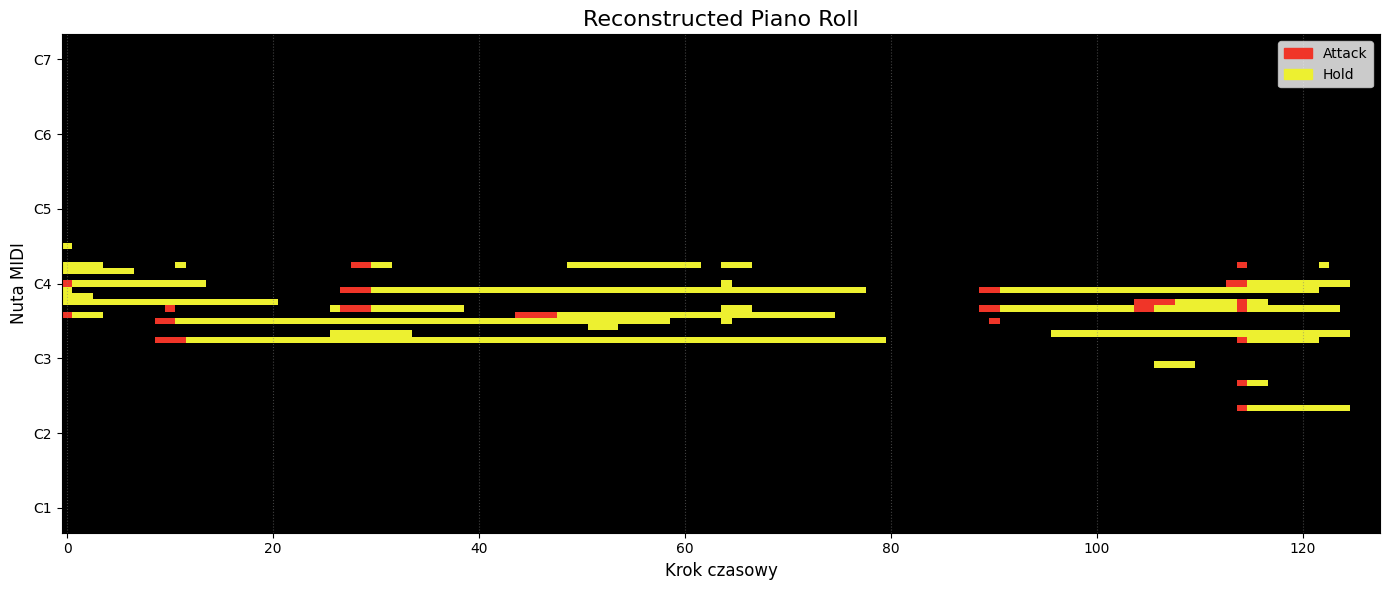

________________________________________________________________________________________________________________________


Epoch 120
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_120.pth


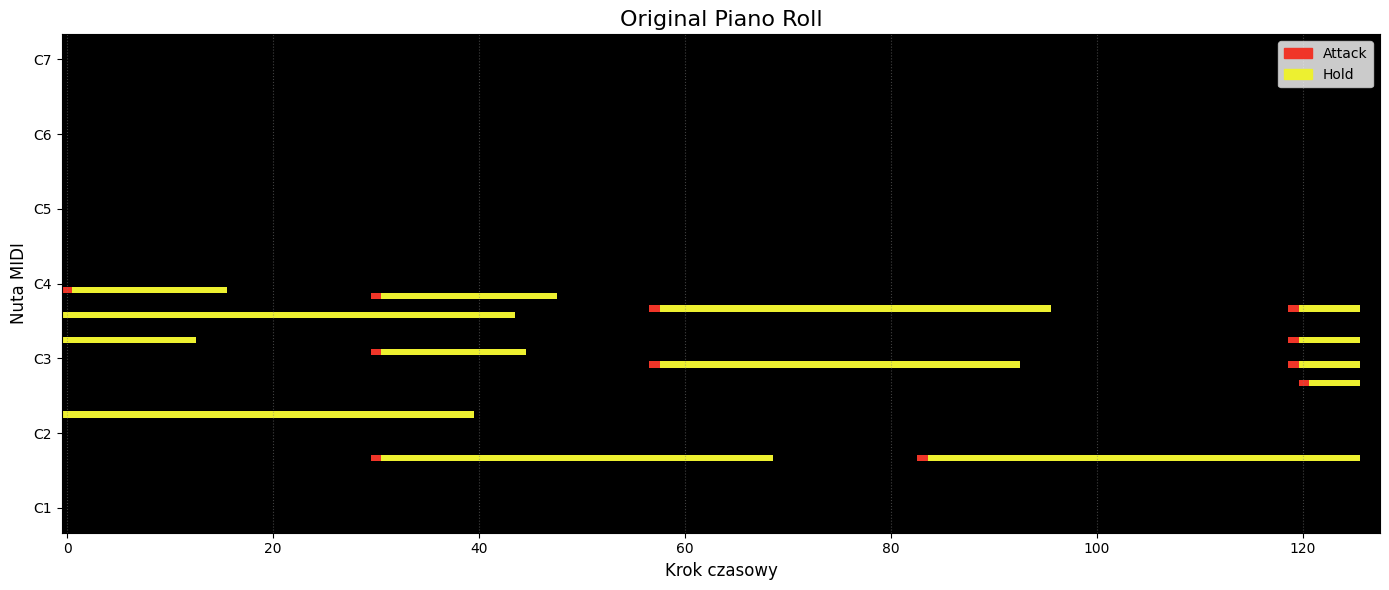

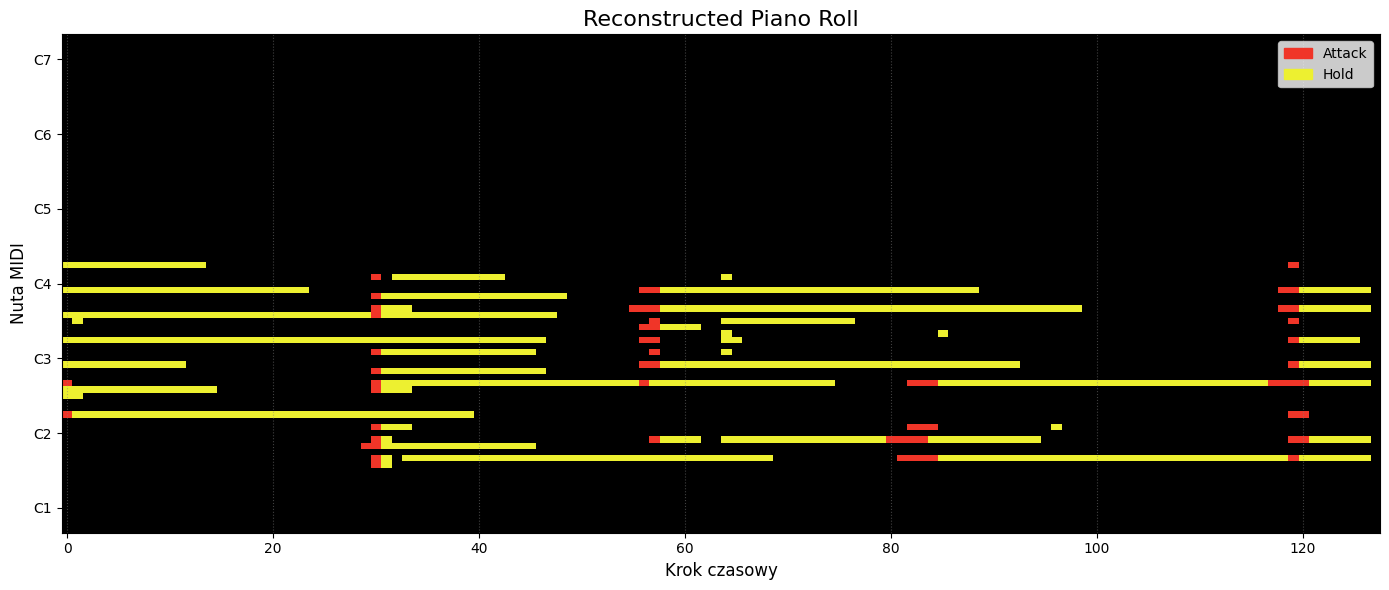

________________________________________________________________________________________________________________________


Epoch 130
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_130.pth


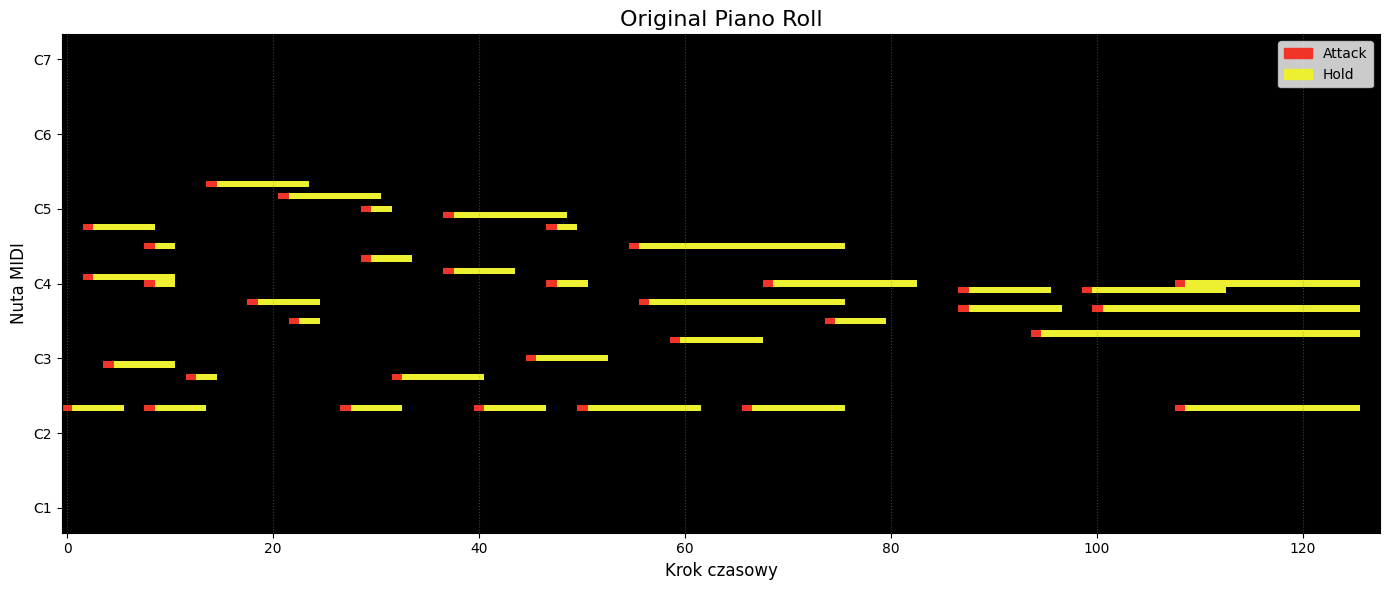

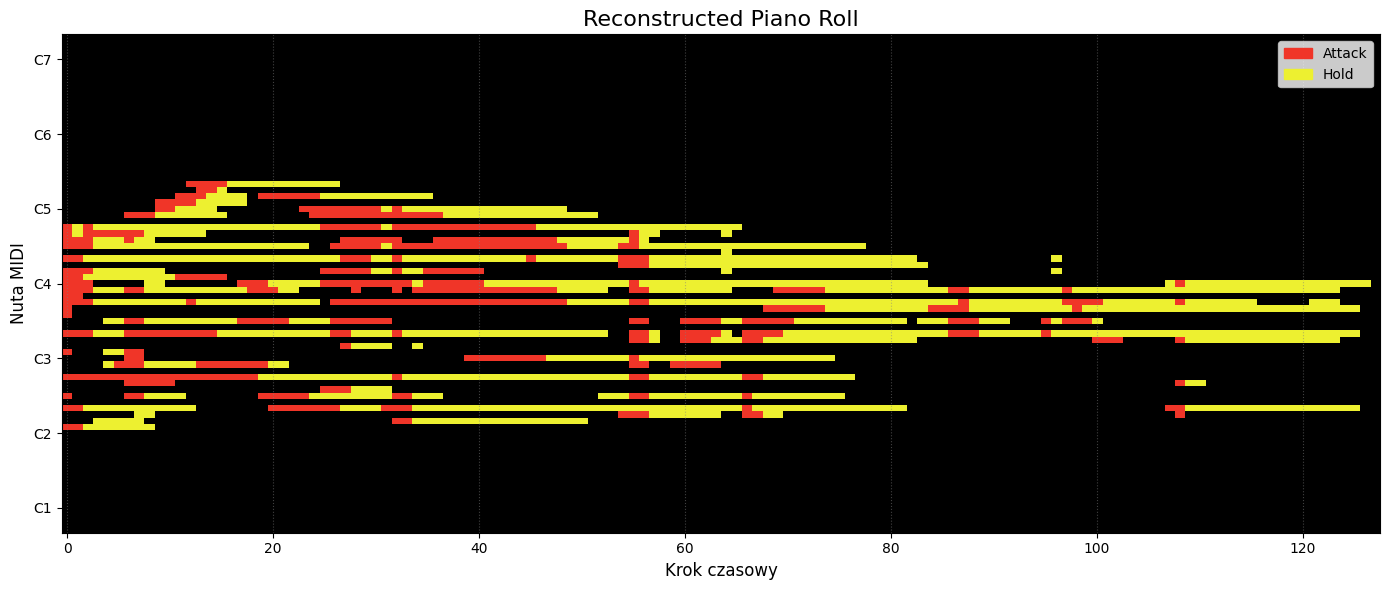

________________________________________________________________________________________________________________________


Epoch 140
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_140.pth


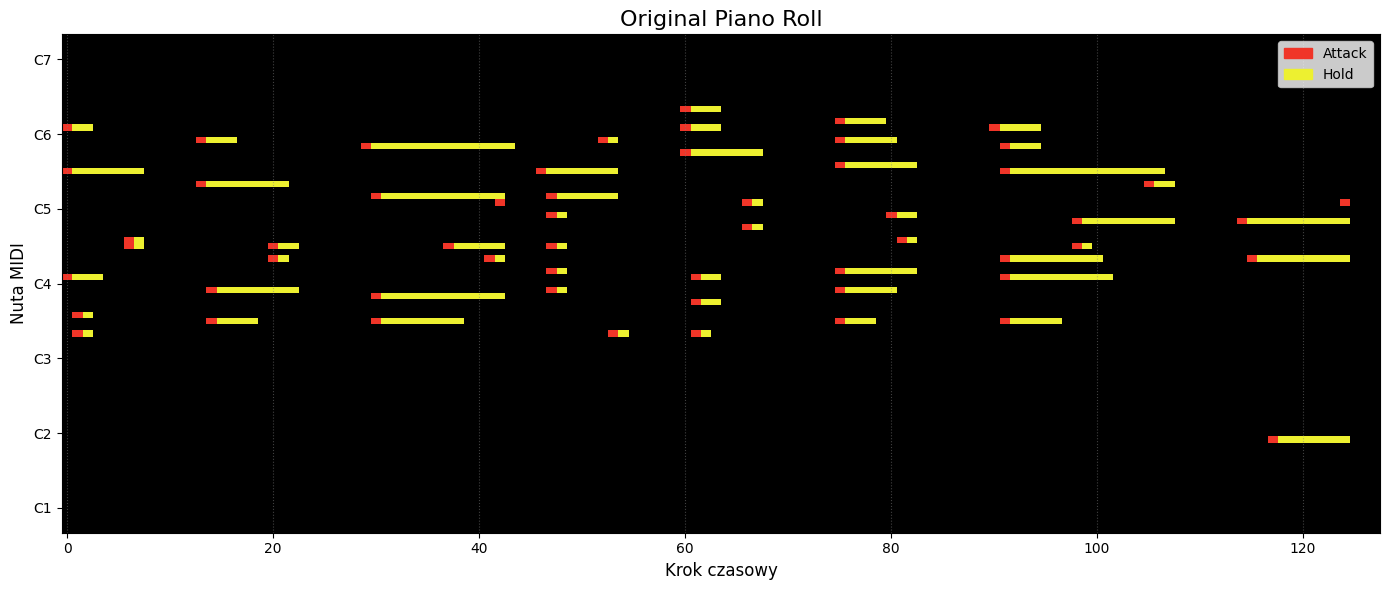

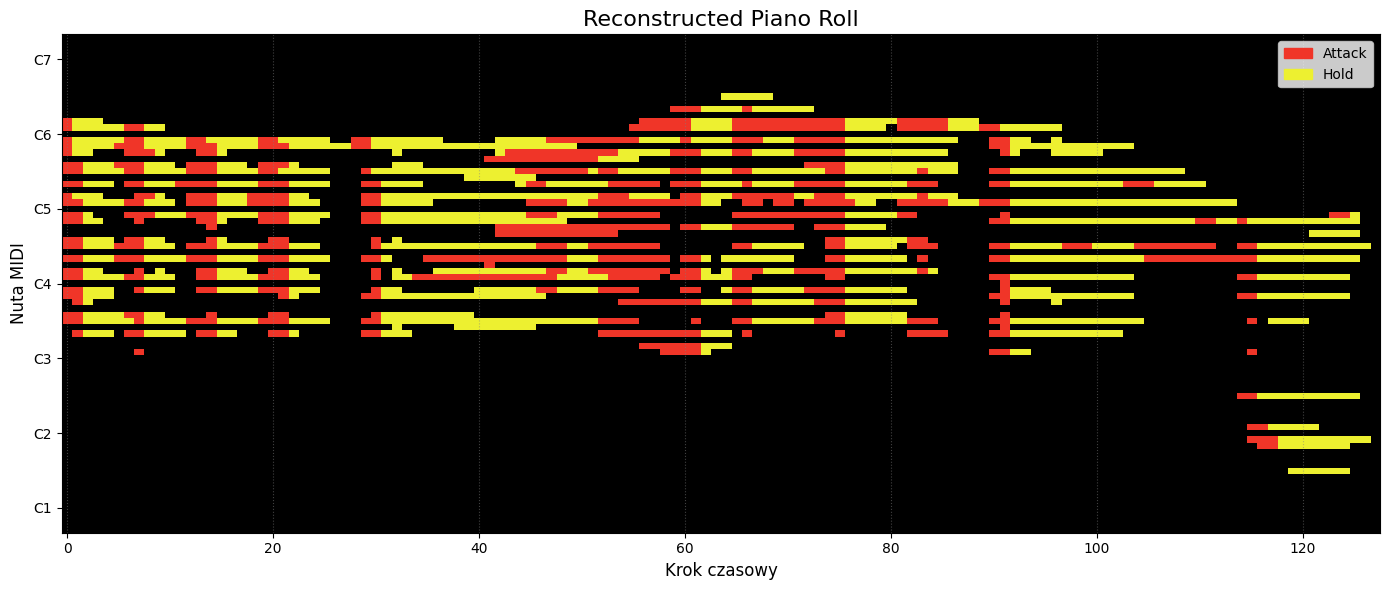

________________________________________________________________________________________________________________________


Epoch 150
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_150.pth


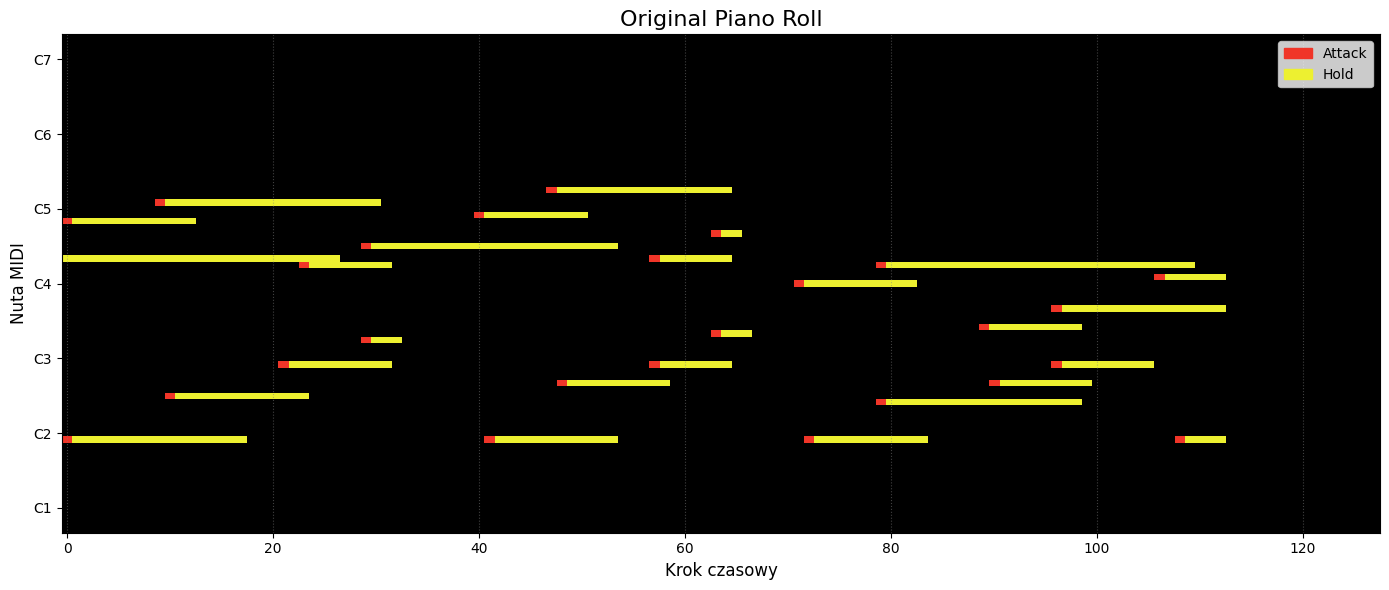

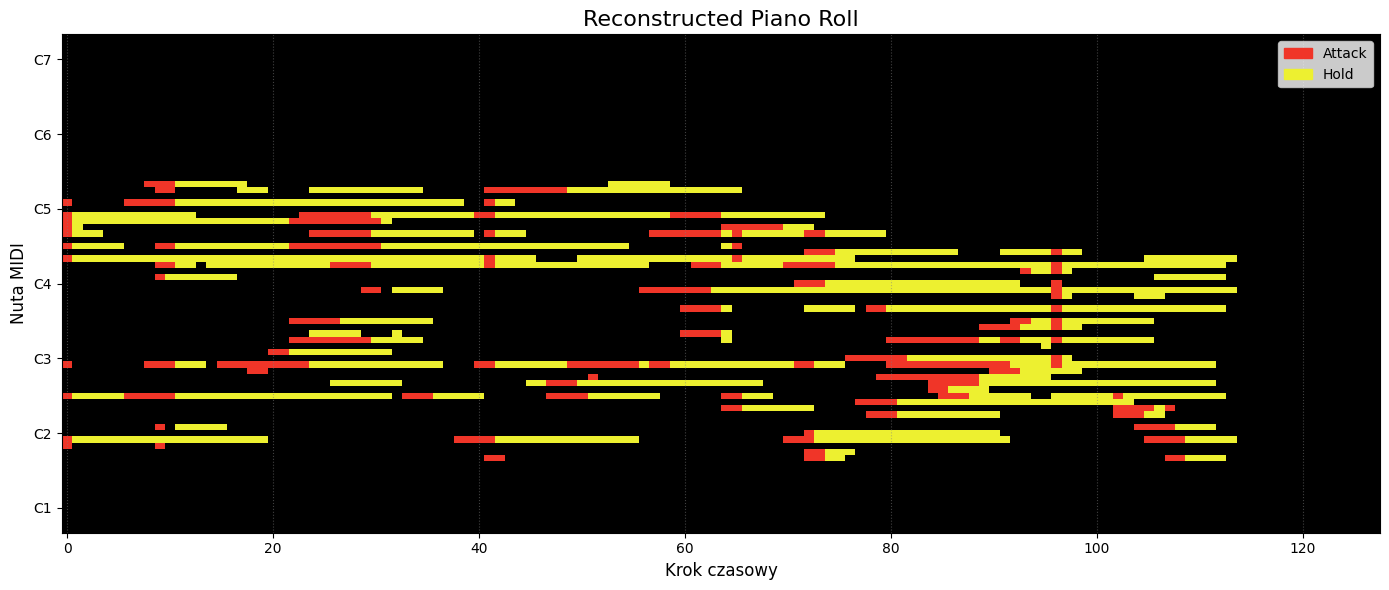

________________________________________________________________________________________________________________________




In [ ]:
for epoch in range(10, 151, 10):
    print(f"Epoch {epoch}")
    model = LofiModel()
    model.load_weights(fr"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\lofi_model_epoch_{epoch}.pth")
    original_sequence_tensor= dataset[epoch]
    # print(f"Processing file: {file_name}")
    reconstructions = model.reconstruct(original_sequence_tensor, output_path=f"reconstructed/reconstructed_{epoch}.mid")
    print(60*"__"+"\n")
    print()